# 9. Unsupervised Learning Techniques

Although most of the applications of ML today are based on supervised learning, the vast majority of the available data is unlabeled - we have input features `X`, but we do not have the labels `y`.

Say you want to create a system that will take a few pictures of each item on a manufacturing produciotn line and detect which items are defective. You can fairly easily create a system that will take pictures automatically, and this might give you thousands of pictures every day. You can then build them a reasonably large dataset in just a few weeks - however there would be no labels! 

If you wanted to train a binary classifier to label each picture as "defective" or "normal", generally you would need human experts to down and manually go through all the pictures, which is a long and tedious process and usually only done on a small subset of pictures (meaning the training set would be small and classifiers performance would be dissapointing). Worse yet, we would need to repeat this process each time anytime the company makes a change to one of it's products. Enter unsupervised learning techniques!

We will look a few unsupervised learning techniques this chapter:

* **Clustering**: The goal is to group similar instances together into clusters. Clustering is a great tool for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, & more.
* **Anomoly Detection**: The goal is to learn what "normal" data looks like and then use that to detect abnormal instances, such as defects on a production line.
* **Density Estimation**: This is the task of estimating the `probability density function (PDF)` of the random process that generated the dataset. Density estimation is commonly used for anomoly detection: instances in very low density regions are likely to be anomolies.

## Clustering

Clustering is the task of identifying similar instances of an object or dataset and assigning them to clusters, or groups of similar instances. 

Clustering is used in a wide variety of applications, including:

* **Customer Segmentation**: You can cluster your customers based on their purchases and activity on a website, which is useful for understanding who your customers are and what they need, allowing you to adapt your product and marketing campaigns to each segment.
* **Data Analysis**: When analyzing a new data segment, it can be helpful to run a clustering algorithm and then analyze each cluster seperatly.
* **Dimensionality Reduction Technique**: Once a dataset has been clustered, it is usually possible to measure each instances affiniity with each cluster e.g a measure of how well an instance fits into each cluster.
* **Anomoly Detection**: An instance that has a low affinity to a cluster is likely to be an anomoly. For instnace, fraud detection.
* **Semi-Supervised Learning**: If you only have a few labels, you can perform clustering to propogate the labels to all instances in the same cluster. This technique can greatly increase the # of labels available for a subsequent supervised learning algorithm and thus improve it's performance. 
* **Search Engines**: Some search enginers let you search for images that are similar to a reference image. To build such a system, you would first apply a clustering algo to al lthe images in the database - similar instances would end up in the same cluster. Then when a user provides a reference image, you can use trained clustering model to find the images cluster and return all the images from this cluster.
* **Image Segmentation**: By clustering pixels according to their color, then replace each pixels color w/ the mean clolor it's cluster, it is possible to consderably reduce the # of different colors in the image. Image segmenation is used in many object detection & tracking systems.

Let's explore two popular clustering algo's - `KMeans` and `DBSCAN`:

### K-Means

Let's train a K-Means cluster based on a fake dataset:

In [6]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

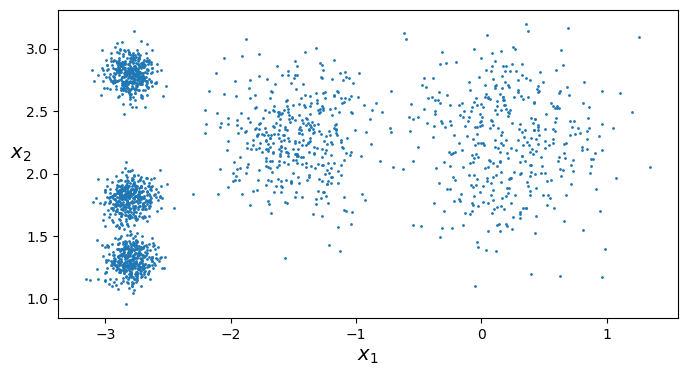

In [8]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [9]:
from sklearn.cluster import KMeans

k = 5 # Fit into 5 clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit_predict(X)

/Users/zacharymessinger/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 4, 1, ..., 0, 1, 4], dtype=int32)

Each instance was assigned to one of the five clusters. In the context of clustering, an instances label is the index of the cluster that this instance get's assigned to by the algo - it is not to be confused w/ the class lables in classification. The `KMeans` instance preserves a copy of the labels of the instances it was trained on, availa